<a href="https://colab.research.google.com/github/sukhmanib93/Churn-Prediction/blob/main/TelcoCustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Problem Definition**
The aim is to predict if an individual customer will churn or not. To accomplish that, machine learning models are trainned based on 80% of the sample data. The remaining 20% are used to apply the trainned models and assess their predictive power with regards to ´churn/ not churn`. 

A side question will be, which features actually drive customer churn. That information can be used to identify customer "pain points" and resolve them by providing goodies to make customers stay.

To compare models and select the best for this task, the accuracy is measured. Based on other characteristics of the data, for example the balance between classes (number of "churners" vs. "non-churners" in data set) further metrics are considered if needed.

## **Data Collection**
The data set for this classification problem is taken from Kaggle 
(https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

The use case pipeline build-up is started with imports of some basic libraries that are needed throughout the case. This includes Pandas and Numpy for data handling and processing as well as Matplotlib and Seaborn for visualization.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_rows', None)
pd.set_option('max_columns', 100)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-churn.csv to Telco-Customer-churn.csv


In [3]:
data = pd.read_csv('Telco-Customer-churn.csv')


## **Exploratory Data Analysis**

Once the data is collected, certain steps are carried out to explore the data. The primary focus of this step is to have a good understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns, get rid of extreme outliers and build and validate hypothesis 

### **Understanding of the data**

In [4]:
#Get the first 5 entries of the data set
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
## Get a summary on the data frame incl. data types, shape and memory storage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Get statistical information on numerical features.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# Get statistical information on numerical features.
data.describe(include = 'object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
# Looping through the columns to get unique values per column.
for i in data.columns:
    print(f"Unique {i}'s count: {data[i].nunique()}")
    print(f"{data[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

#### **Meaning of attributes**
By examining all the columns and their unique values, a general understanding about the features can be built. The features can be clustered into different categories.

#####  **Classification labels**

*  Churn - Whether the customer churned or not (Yes or No)

#####  **Customer services booked** 

* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

#####  **Customer account information**

* Tenure - Number of months the customer has stayed with the company
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges - The total amount charged to the customer


#####  **Customers demographic info**

* customerID - Customer ID
* Gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)



#### **Data Preprocessing for EDA**


In [9]:
telco_data = data.copy()

In [10]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#Converting data types of Total Charges and Tenure to float

telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors= 'coerce')

def feature_to_float(feature_list, df):
  for i in feature_list:
    df[i]= df[i].astype(float)
  return df.head()

feature_to_float(['tenure'], telco_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Renaming the data values of "PaymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
telco_data["PaymentMethod"].replace(payment_column, inplace=True)

In [13]:
# Checking the data types for any unintended data types.
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
# Counting the number of missing values.
telco_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see that we have 11 missing values in `TotalCharges` which is just 0.15% of the data, hence it will be deletd for simplicity.

###  **Hypothesis Building**

Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:

1. The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.
2. Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles - for bundles customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
3. Customers with spouses and children might churn less to keep the services running for their family.
4. Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.
5. More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.
6. Senior citizens tend to churn less due to the extended effort associated with terminating contracts.

### **Data Exploration**






In [15]:
# Apply the Fivethirtyeight style to all plots.
plt.style.use("fivethirtyeight")

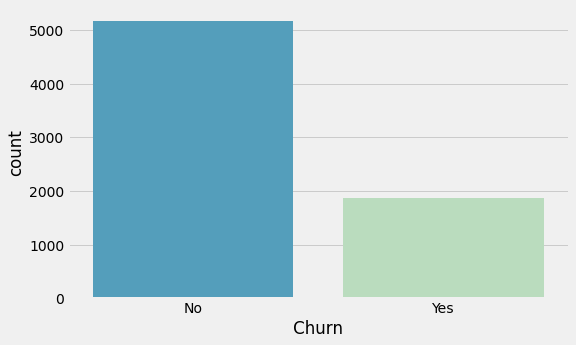

In [16]:
#Display the frequency to Churn

plt.figure(figsize = (8,5))
ax = sns.countplot(x = telco_data['Churn'], palette = 'GnBu_r') #linewidth = 1)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [17]:
#Generating Boxplots for Tenure, Monthly Charges and Total Charges
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

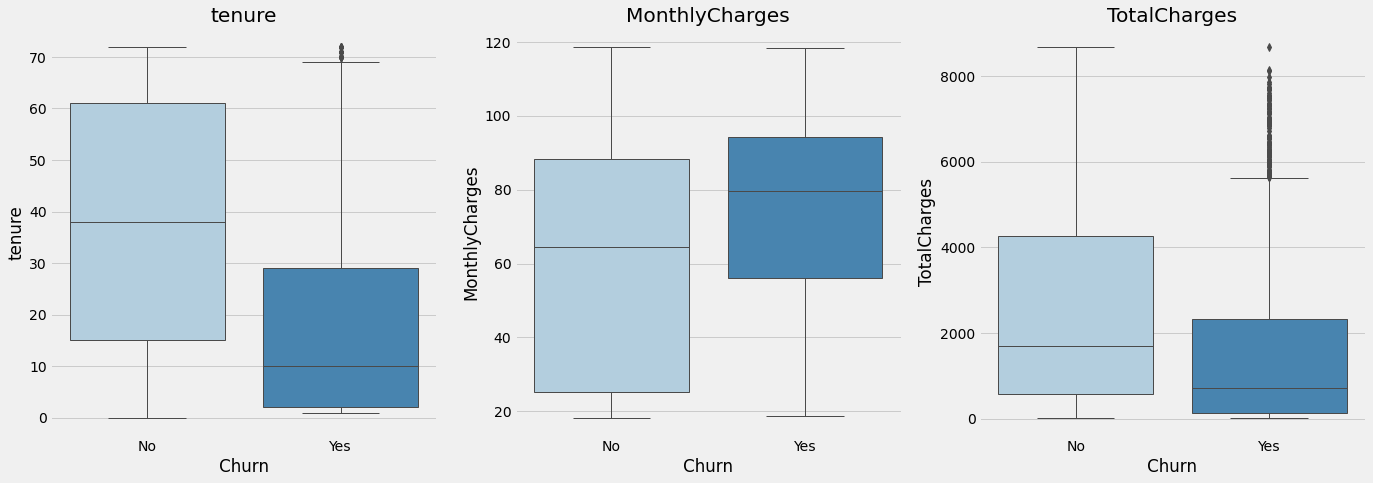

In [18]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], telco_data)

Plot insights:

1. Churning customers have much lower tenure with a median of 10 months compared to a median of non-churners of 38 months.
2. Churning customers have higher monthly charges with a median of 80 USD and much lower interquartile range compared to that of non-churners (median of 65 USD).
3. TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [19]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

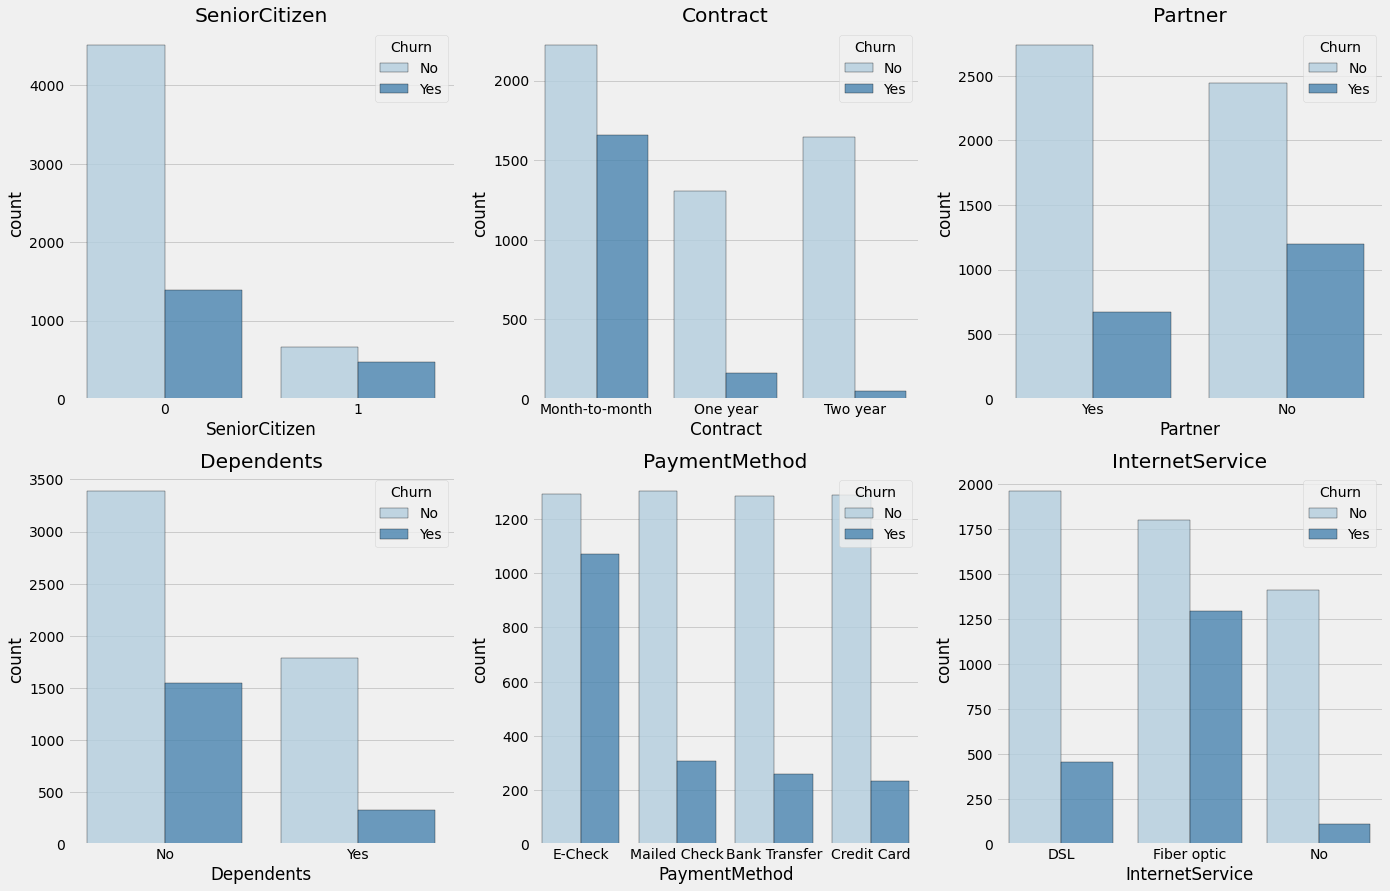

In [20]:
# Generate countplots for various features.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], telco_data)

Plot insights:

1. Senior citizens churn rate is much higher than non-senior churn rate.
2. Churn rate for month-to-month contracts much higher that for other contract durations.
3. Moderately higher churn rate for customers without partners.
4. Much higher churn rate for customers without children.
5. Payment method electronic check shows much higher churn rate than other payment methods.
6. Customers with InternetService fiber optic as part of their contract have much higher churn rate.

#### **Check for Outliers in Numerical Features**

In [21]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = telco_data[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

No outliers in numerical features detected with the IQR method - no adjustments made.

### **Data Cleaning**

In [22]:
# Drop the rows with missing values.
telco_data.dropna(inplace=True)

### **Feature Engineering Actions**

Based on the data types and the values, following actions are defined to preprocess/engineer the features for machine readibility and further analysis:

* Columns removed
customerID: not relevant

* No action
SeniorCitizen

* Label encoding The following features are categorical and each take on 2 values (mostly yes/no) - therefore are transformed to binary integers

  1. gender
  2. Partner
  3. Dependents
  4. Churn
  5. PhoneService
  6. PaperlessBilling

* One-Hot Encoding The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0).
  1. MultipleLines
  2. InternetService
  3. OnlineSecurity
  4. OnlineBackup
  5. DeviceProtection
  6. TechSupport
  7. StreamingTV
  8. StreamingMovies
  9. Contract
  10. PaymentMethod

* Min-Max Scaling Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard approach for scaling. For normally distributed features standard scaler could be used, which scales values around a mean of 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.

  1. tenure
  2. TotalCharges
  3. MonthlyCharges

## **Feature Engineering**

Feature Selection / Generation

In [23]:
# Drop customerID feature.
telco_data.drop(columns='customerID', inplace = True)

In [24]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.
telco_data['Number_AdditionalServices'] = (telco_data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] =='Yes').sum(axis=1)


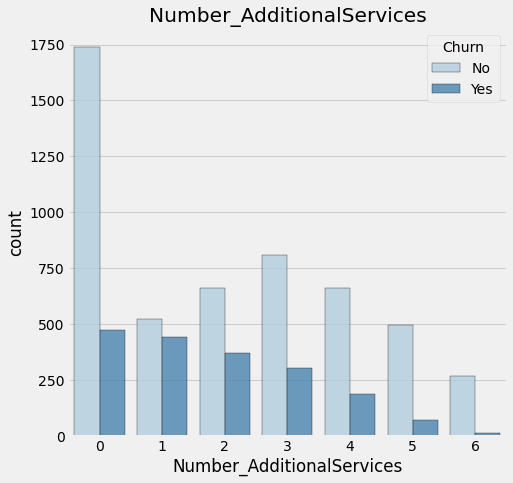

In [25]:
# Generate countplot for the new feature.
countplot('Churn', ['Number_AdditionalServices'], telco_data)

Plot insights:

* The countplot shows a very high churn rate for customers that have 1 additional service.
* Customers with a very high number of additional services do have a low churn rate.

#### **Label Encoding**

In [26]:
# Label encoding for identified columns.
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return       

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], telco_data)

telco_data['gender'] = telco_data['gender'].map({'Female': 1, 'Male': 0})

#### **One-Hot-Encoding**

In [27]:
# One-Hot-Encoding for identified columns.
features_ohne = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

telco_data = pd.get_dummies(telco_data, columns=features_ohne) 

#### **Feature Rescaling: Min-Max-Scaling**

In [28]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(telco_data, columns=features_mms)
df_remaining_features = telco_data.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

telco_data = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

#### **Correlation analysis**

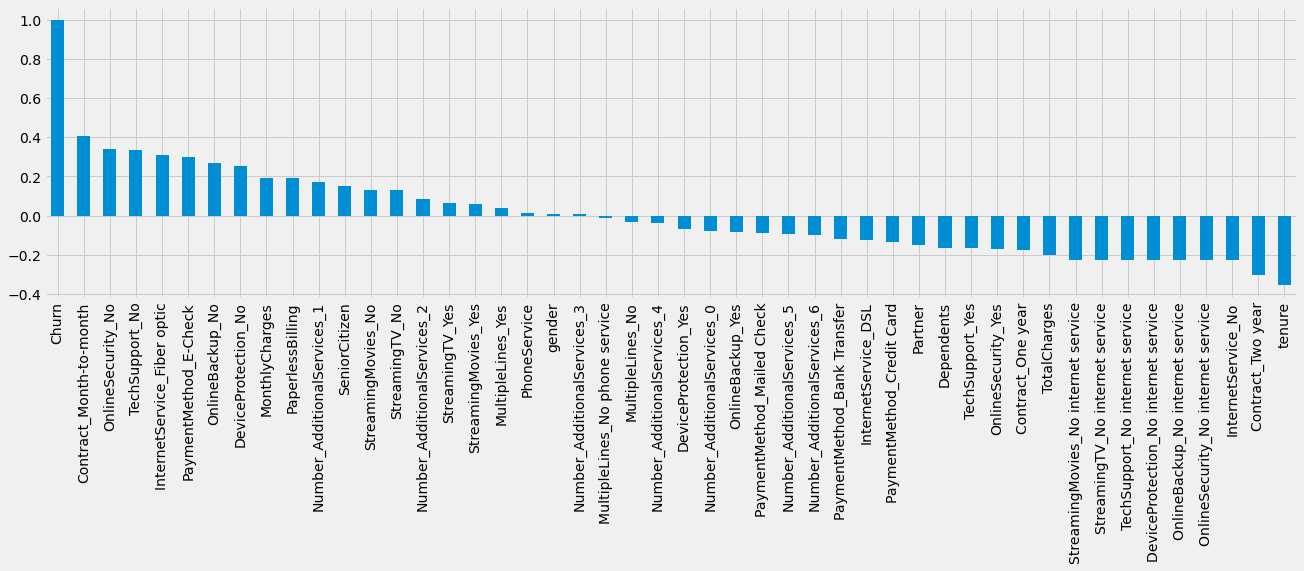

In [29]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
telco_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

## **Train and Split**

For conduction of model training and testing steps, the data set is split into 80% training data and 20% test data. The "Churn" column is defined as the class (the "y"), the remaining columns as the features (the "X").

In [30]:
#Applying sklearn's splitter function train_test_split 
from sklearn.model_selection import train_test_split

X1 = telco_data.drop('Churn', axis=1)
X = X1.values
y = telco_data['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

## **Model Evaluation Metric**

For performance assessment of the chosen models, various metrics are used:

* *Feature weights*: Indicates the top features used by the model to generate the predictions
* *Confusion matrix*: Shows a grid of true and false predictions compared to the actual values
* *Accuracy score*: Shows the overall accuracy of the model for training set and test set
* *ROC Curve*: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
* *AUC (for ROC)*: Measures the overall separability between classes of the model related to the ROC curve
* *Precision-Recall-Curve*: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
* *F1 Score*: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
* *AUC (for PRC)*: Measures the overall separability between classes of the model related to the Precision-Recall curve

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [114]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:15]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [33]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [34]:
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [35]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

In [56]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model: classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)

    train_f1 = metrics.f1_score(train_y,pred_train)
    test_f1 = metrics.f1_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("F1 on training set : ",metrics.f1_score(train_y,pred_train))
        print("F1 on test set : ",metrics.f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

## **Model Selection, Training, Prediction and Assessment**

In the beginning we will test out several models and measure their performance by several metrics. Those models will be optimized in a later step by tuning their hyperparameters. The models used include:

* K Nearest Neighbors - fast, simple and instance-based
* Logistic Regression - fast and linear model
* Random Forest - slower but accurate ensemble model based on decision trees
* Support Vector Machines - slower but accurate model used here in the non-linear form

#### **K Nearest Neighbors**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Instanciate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

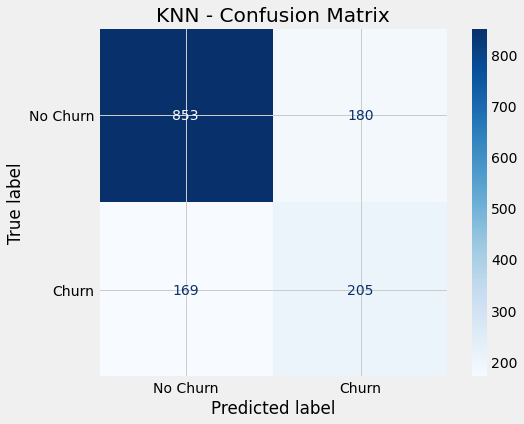

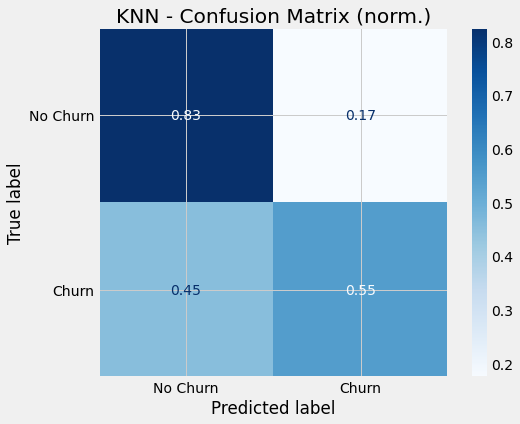

Accuracy Score Test: 0.751954513148543
Accuracy Score Train: 0.8341333333333333 (as comparison)



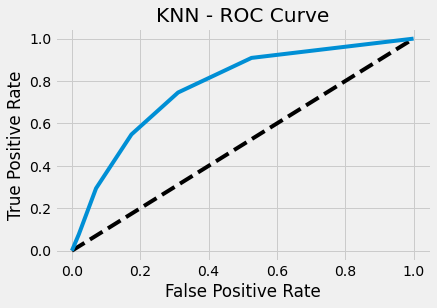

AUC Score (ROC): 0.7727143308260557



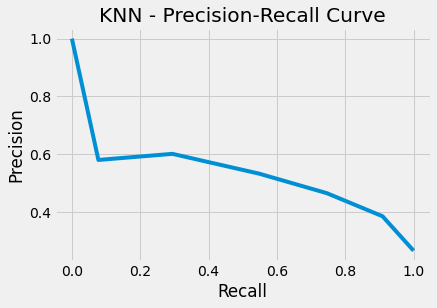

F1 Score: 0.5401844532279314 
AUC Score (PR): 0.5307110601099672

Accuracy on training set :  0.8341333333333333
Accuracy on test set :  0.751954513148543
Recall on training set :  0.6347826086956522
Recall on test set :  0.5481283422459893
Precision on training set :  0.7103293413173652
Precision on test set :  0.5324675324675324
F1 on training set :  0.6704344754503709
F1 on test set :  0.5401844532279314


In [61]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')
scores_KNN = get_metrics_score(knn,X_train,X_test,y_train,y_test)

#### **Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

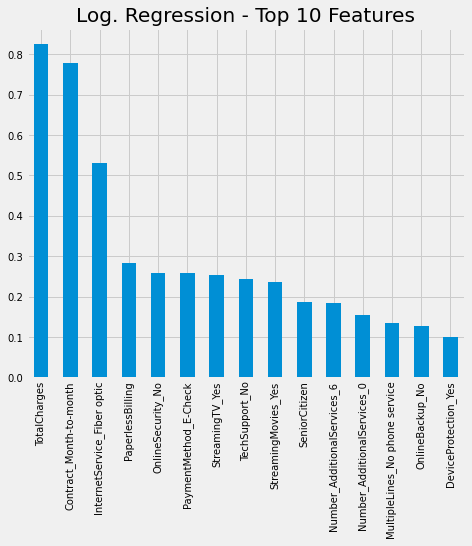

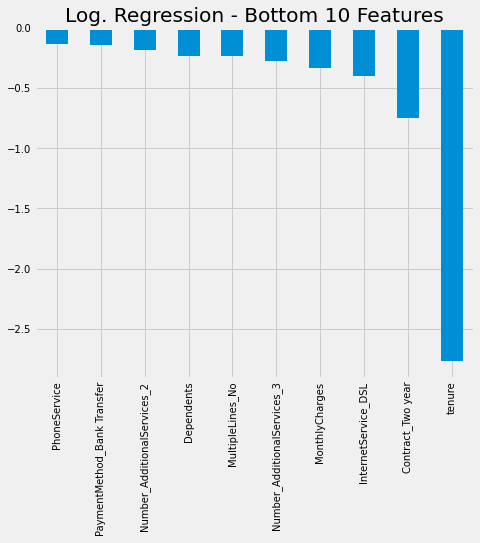

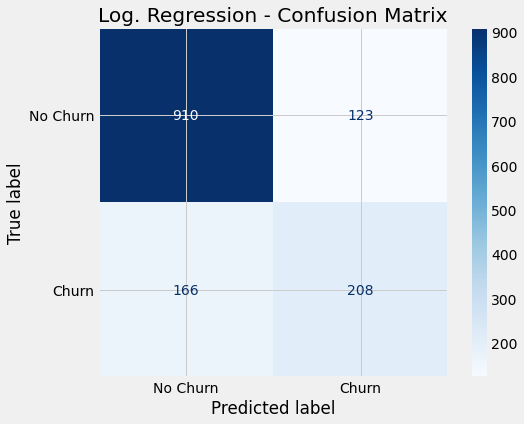

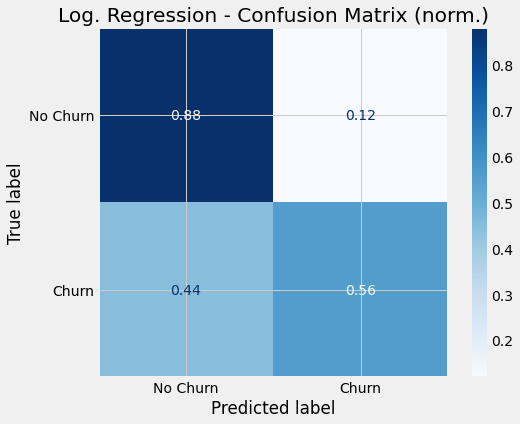

Accuracy Score Test: 0.7945984363894811
Accuracy Score Train: 0.8039111111111111 (as comparison)



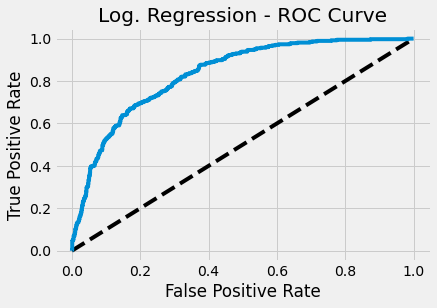

AUC Score (ROC): 0.8338428128445781



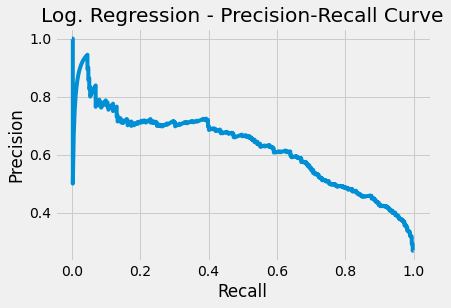

F1 Score: 0.5900709219858156 
AUC Score (PR): 0.6242782014143009

Accuracy on training set :  0.8039111111111111
Accuracy on test set :  0.7945984363894811
Recall on training set :  0.5538461538461539
Recall on test set :  0.5561497326203209
Precision on training set :  0.6550632911392406
Precision on test set :  0.6283987915407855
F1 on training set :  0.6002174700978615
F1 on test set :  0.5900709219858156


In [115]:
# Plot model evaluations.
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')
scores_LR = get_metrics_score(logreg,X_train,X_test,y_train,y_test)

#### **Random Forest**

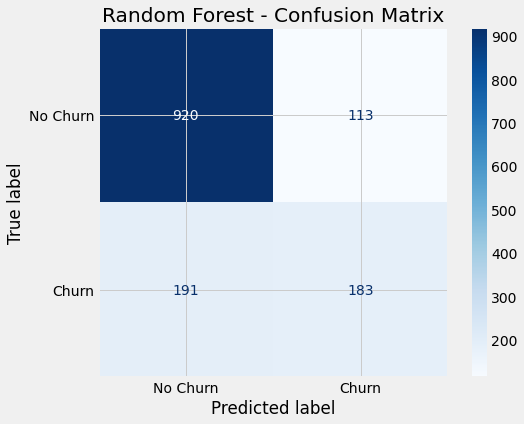

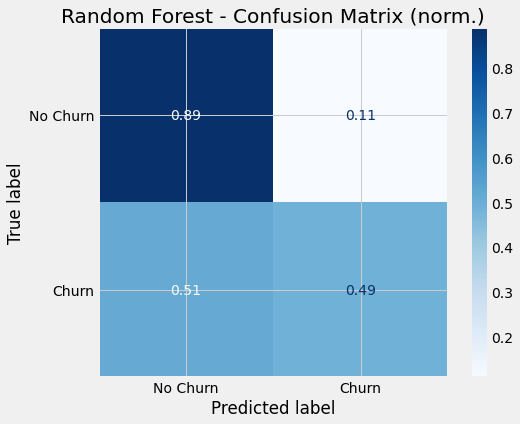

Accuracy Score Test: 0.7839374555792467
Accuracy Score Train: 0.9987555555555555 (as comparison)



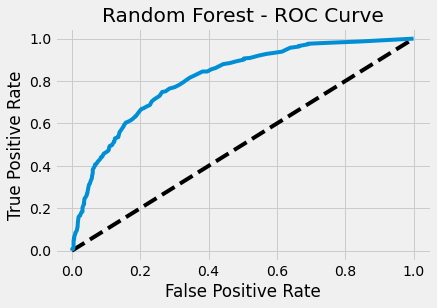

AUC Score (ROC): 0.811261783601058



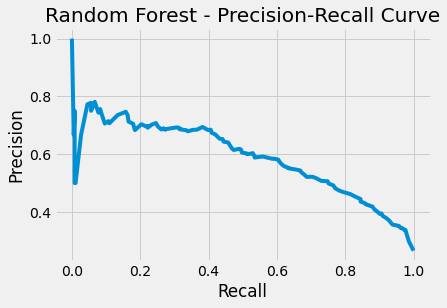

F1 Score: 0.5462686567164179 
AUC Score (PR): 0.587800307258419

Accuracy on training set :  0.9987555555555555
Accuracy on test set :  0.7839374555792467
Recall on training set :  0.9966555183946488
Recall on test set :  0.4893048128342246
Precision on training set :  0.9986595174262735
Precision on test set :  0.6182432432432432
F1 on training set :  0.9976565115500502
F1 on test set :  0.5462686567164179


In [64]:
from sklearn.ensemble import RandomForestClassifier

# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')
scores_RF = get_metrics_score(rf,X_train,X_test,y_train,y_test)

#### **Support Vector Machine**

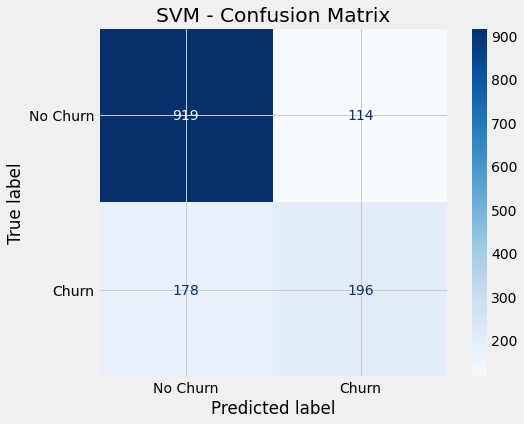

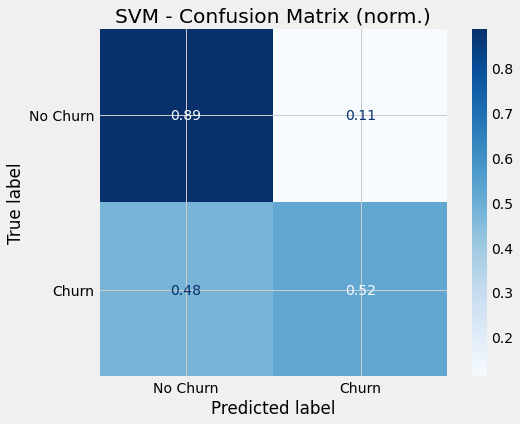

Accuracy Score Test: 0.7924662402274343
Accuracy Score Train: 0.8238222222222222 (as comparison)



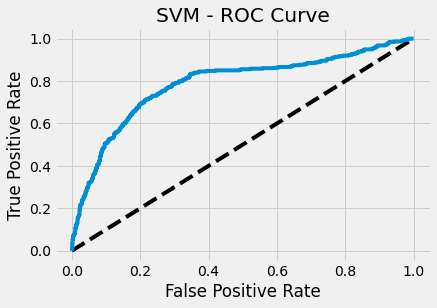

AUC Score (ROC): 0.7865272219950199



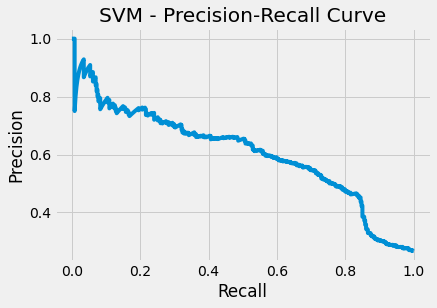

F1 Score: 0.5730994152046783 
AUC Score (PR): 0.6049738293199798

Accuracy on training set :  0.8238222222222222
Accuracy on test set :  0.7924662402274343
Recall on training set :  0.5705685618729097
Recall on test set :  0.5240641711229946
Precision on training set :  0.7096505823627288
Precision on test set :  0.632258064516129
F1 on training set :  0.6325546903967372
F1 on test set :  0.5730994152046783


In [65]:
from sklearn.svm import SVC

# Instanciate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True) 
support_vector_m.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')
scores_SVM = get_metrics_score(support_vector_m,X_train,X_test,y_train,y_test)

#### **XGBoost**

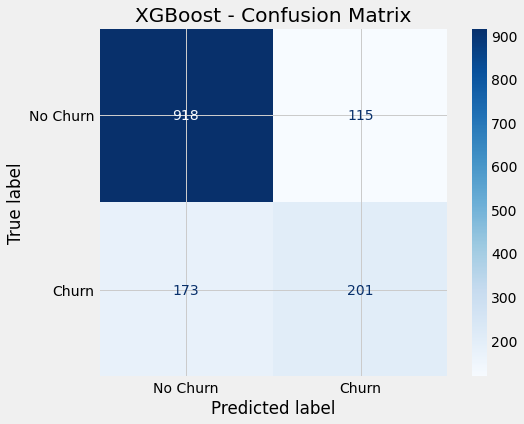

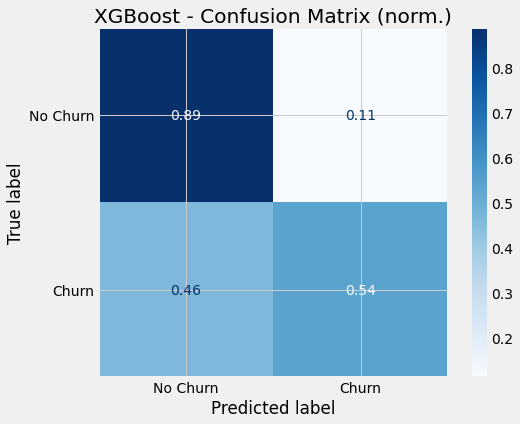

Accuracy Score Test: 0.7953091684434968
Accuracy Score Train: 0.8224 (as comparison)



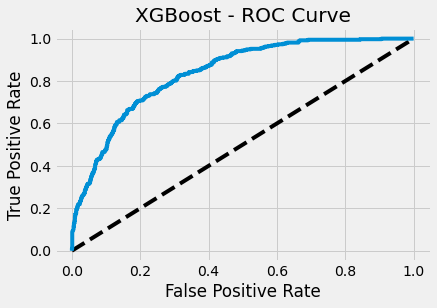

AUC Score (ROC): 0.8379479839106285



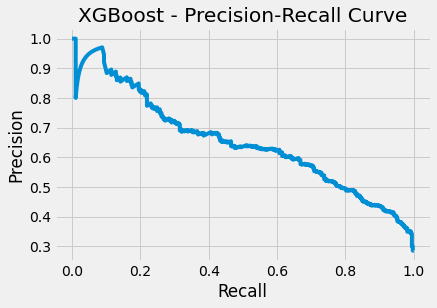

F1 Score: 0.5826086956521739 
AUC Score (PR): 0.6512140425064051

Accuracy on training set :  0.8224
Accuracy on test set :  0.7953091684434968
Recall on training set :  0.5665551839464883
Recall on test set :  0.5374331550802139
Precision on training set :  0.7070116861435726
Precision on test set :  0.6360759493670886
F1 on training set :  0.6290382473078351
F1 on test set :  0.5826086956521739


In [94]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, xgb, y_pred_xgb, 'XGBoost')
roc_curve_auc_score(X_test, y_test, y_pred_xgb_prob, 'XGBoost')
precision_recall_curve_and_scores(X_test, y_test, y_pred_xgb, y_pred_xgb_prob, 'XGBoost')
scores_XGB = get_metrics_score(xgb,X_train,X_test,y_train,y_test)

## **Hyperparameter Tuning/Model Improvement**

To address a potential bias stemming from the specific split of the data in the train-test-split part, cross-validation is used during hyperparameter tuning with Grid Search and Randomized Search. Cross validations splits the training data into in a specified amount of folds. For each iteration one fold is held out as "training-dev" set and the other folds are used as training set. Result of cross-validation is k values for all metrics on the k-fold CV.

#### **K Nearest Neighbors (Optimized)**

For KNN GridSearch CV is used to determine the optimal number of neighbors (k) leading to the best model performance.

In [45]:
%%time
from sklearn.model_selection import GridSearchCV

#Define parameter grid for GridSearch and instanciate and train model.
param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_scorer = metrics.make_scorer(metrics.f1_score)
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring = knn_scorer)
knn_cv.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': 25} 

CPU times: user 29.8 s, sys: 14 s, total: 43.8 s
Wall time: 27.7 s


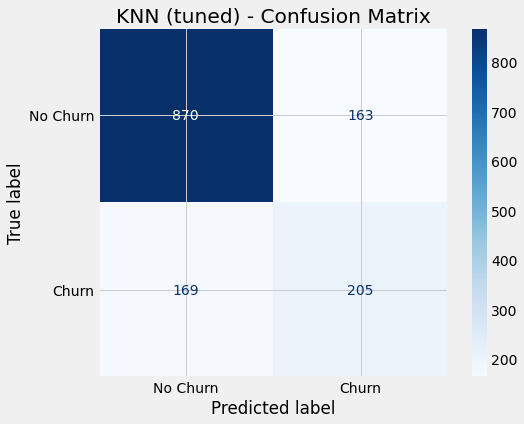

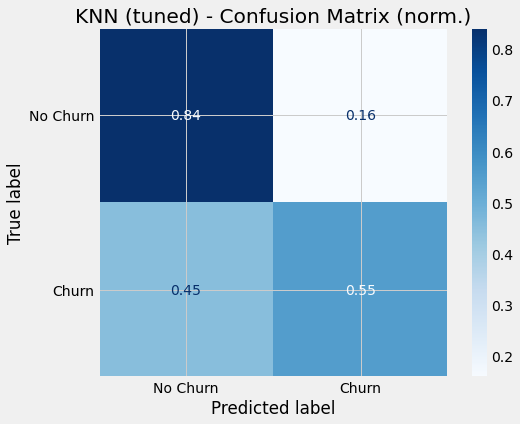

Accuracy Score Test: 0.7640369580668088
Accuracy Score Train: 0.6065918653576438 (as comparison)



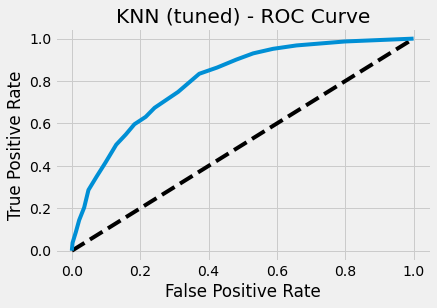

AUC Score (ROC): 0.8014828830414503



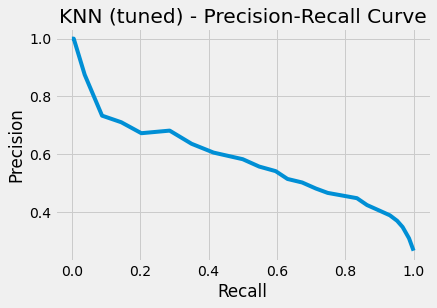

F1 Score: 0.5525606469002694 
AUC Score (PR): 0.5795354623581506

Accuracy on training set :  0.6065918653576438
Accuracy on test set :  0.5525606469002694
Recall on training set :  0.5785953177257525
Recall on test set :  0.5481283422459893
Precision on training set :  0.6374355195283714
Precision on test set :  0.5570652173913043
F1 on training set :  0.6065918653576438
F1 on test set :  0.5525606469002694


In [67]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')
scores_KNN_CV = get_metrics_score(knn_cv,X_train,X_test,y_train,y_test)

#### **Logistic Regression (Optimized)**

For Logistice Regression GridSearchCV is used to determine the best model while applying different values of L1 or L2 regularization to turn the impact of non-meaningful feature to zero (L1) or to simplify the model by relativizing strong patterns that are picked up during training (L2).

In [47]:
%%time
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', random_state =1)   
lr_scorer = metrics.make_scorer(metrics.f1_score)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5, scoring = lr_scorer)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Logistic Regression - Best Parameters:  {'C': 3.3000000000000003, 'penalty': 'l1'}
CPU times: user 3min 20s, sys: 45.5 s, total: 4min 6s
Wall time: 3min 20s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


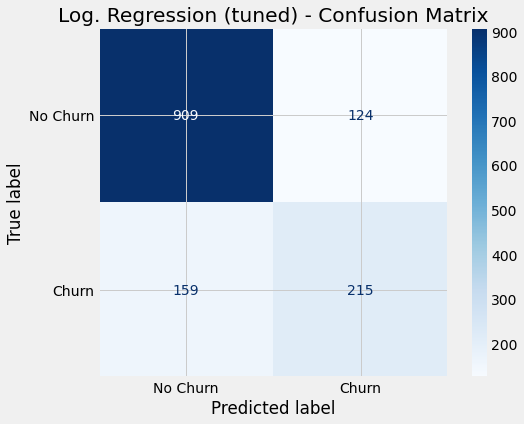

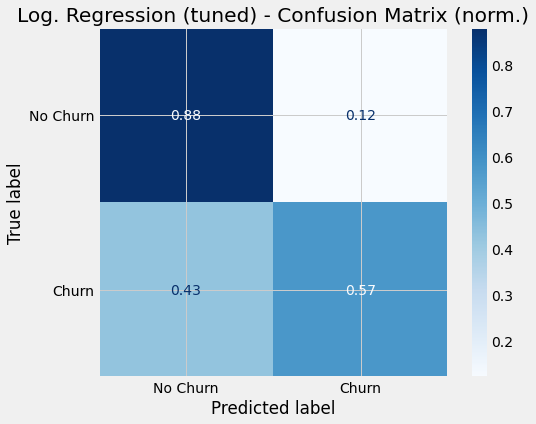

Accuracy Score Test: 0.798862828713575
Accuracy Score Train: 0.6049873509215757 (as comparison)



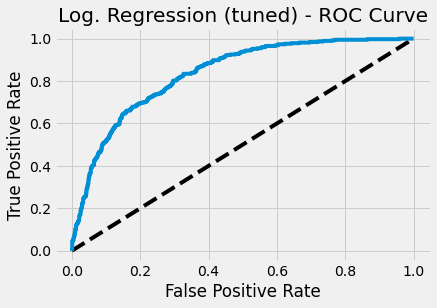

AUC Score (ROC): 0.8351137075440931



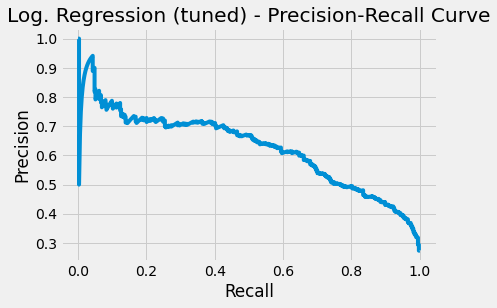

F1 Score: 0.6030855539971949 
AUC Score (PR): 0.6261428371177462

Accuracy on training set :  0.6049873509215757
Accuracy on test set :  0.6030855539971949
Recall on training set :  0.559866220735786
Recall on test set :  0.5748663101604278
Precision on training set :  0.6580188679245284
Precision on test set :  0.6342182890855457
F1 on training set :  0.6049873509215757
F1 on test set :  0.6030855539971949


In [68]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
scores_lg_tuned = get_metrics_score(logreg_tuned_gs,X_train,X_test,y_train,y_test)

#### **Random Forest (Optimized)**

For the Random Forest model RandomizedSearchCV is used to optimize for several hyperparameters including n_estimators, max_features, max_depth, criterion and bootstrap.

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 1100, 10), 
                 'max_features': ['auto'],
                 'max_depth': np.arange(10, 50, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_scorer = metrics.make_scorer(metrics.f1_score)
rf_random_grid = RandomizedSearchCV(estimator=rf,scoring = rf_scorer, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 190, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
CPU times: user 3min 40s, sys: 861 ms, total: 3min 41s
Wall time: 3min 43s


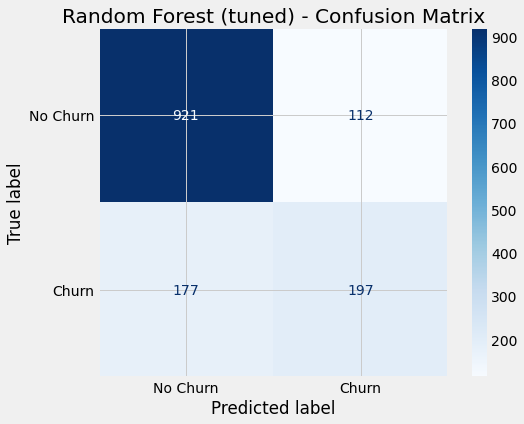

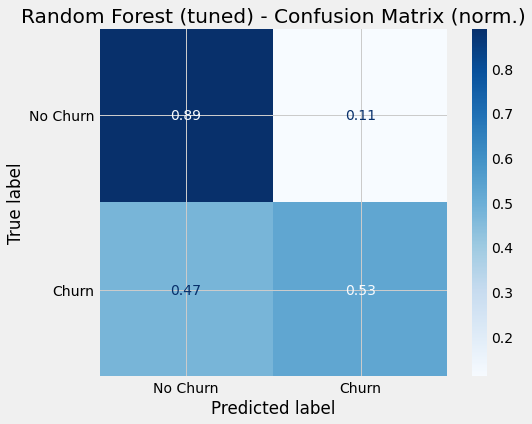

Accuracy Score Test: 0.7945984363894811
Accuracy Score Train: 0.7249451353328457 (as comparison)



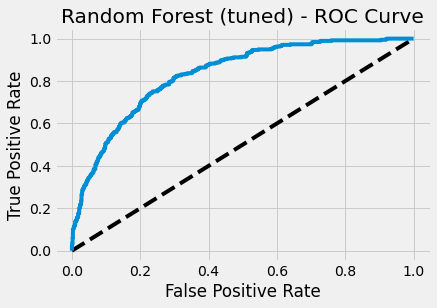

AUC Score (ROC): 0.8312777280233575



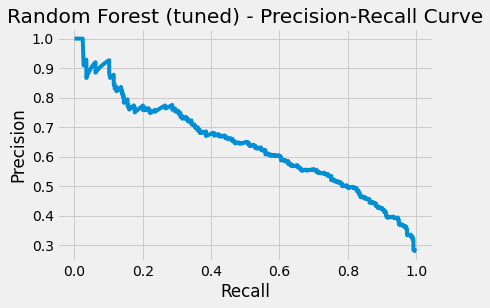

F1 Score: 0.5768667642752562 
AUC Score (PR): 0.6413226978704374

Accuracy on training set :  0.7249451353328457
Accuracy on test set :  0.5768667642752562
Recall on training set :  0.662876254180602
Recall on test set :  0.5267379679144385
Precision on training set :  0.7998385794995965
Precision on test set :  0.6375404530744336
F1 on training set :  0.7249451353328457
F1 on test set :  0.5768667642752562


In [69]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
scores_rf_random_grid = get_metrics_score(rf_random_grid,X_train,X_test,y_train,y_test)

#### **Support Vector Machine**

For SVM GridSearchCV is used to determine the C value for the optimal margin around the support vector.

In [52]:
%%time
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True) 
svm_scorer = metrics.make_scorer(metrics.f1_score)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm,scoring = svm_scorer, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': 0.5} 

CPU times: user 13min 35s, sys: 1.07 s, total: 13min 36s
Wall time: 13min 52s


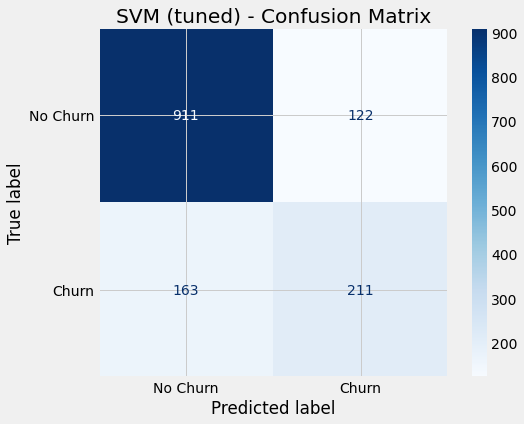

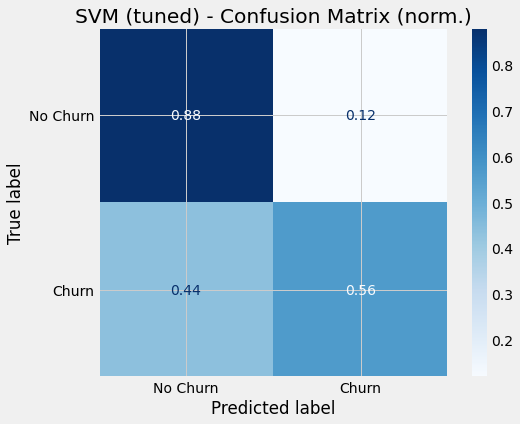

Accuracy Score Test: 0.7974413646055437
Accuracy Score Train: 0.5947521865889213 (as comparison)



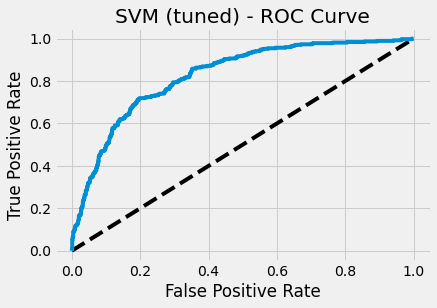

AUC Score (ROC): 0.8261475583809164



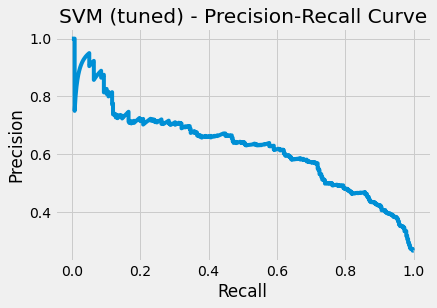

F1 Score: 0.5968882602545968 
AUC Score (PR): 0.6246820786456088

Accuracy on training set :  0.5947521865889213
Accuracy on test set :  0.5968882602545968
Recall on training set :  0.545819397993311
Recall on test set :  0.5641711229946524
Precision on training set :  0.6533226581265013
Precision on test set :  0.6336336336336337
F1 on training set :  0.5947521865889213
F1 on test set :  0.5968882602545968


In [70]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')
scores_svm_tuned = get_metrics_score(support_vector_m_tuned,X_train,X_test,y_train,y_test)

#### **XGBoost Optimized**

In [82]:
%%time
# Choose the type of classifier. 
xgb_tuned =XGBClassifier(objective='binary:logistic',seed=42, subsample=0.9,colsample_bytree=0.5,use_label_encoder=False) 


# Grid of parameters to choose from
parameters = {
    "max_depth": [3, 4,5],
    "scale_pos_weight":[1,3,5],
    "learning_rate":[0.1,0.5, 1.0],
    "gamma":[0,0.25,1.0],
    "reg_lambda" : [1,10,20]
}

# Type of scoring used to compare parameter combinations
xbg_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring = xbg_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train, early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_
print(xgb_tuned)
# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=5, reg_lambda=20,
              scale_pos_weight=3, seed=42, subsample=0.9,
              use_label_encoder=False)
CPU times: user 4min 12s, sys: 1.04 s, total: 4min 14s
Wall time: 4min 14s


XGBClassifier(colsample_bytree=0.5, gamma=0.25, max_depth=5, reg_lambda=20,
              scale_pos_weight=3, seed=42, subsample=0.9,
              use_label_encoder=False)

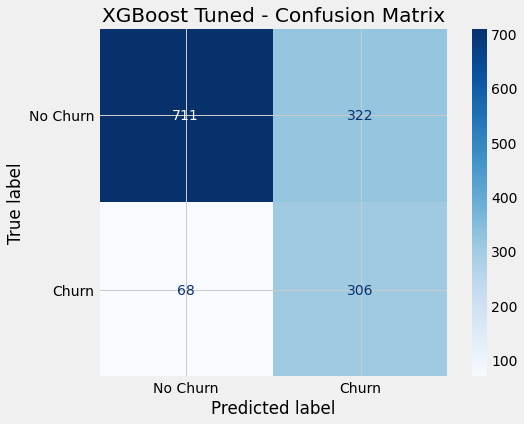

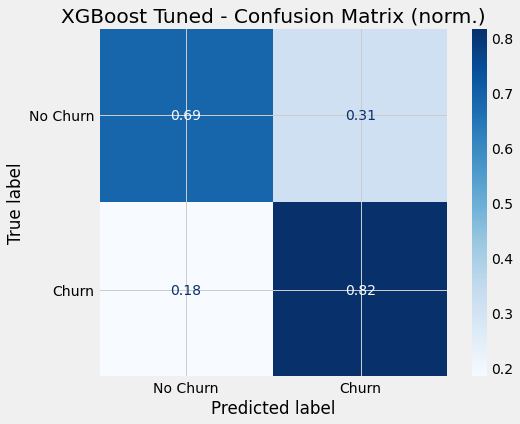

Accuracy Score Test: 0.7228144989339019
Accuracy Score Train: 0.7669333333333334 (as comparison)



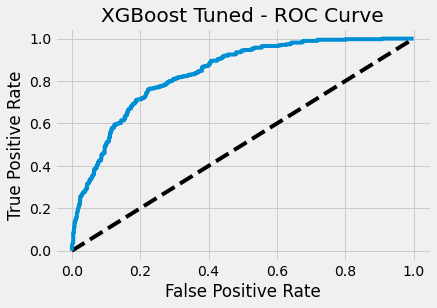

AUC Score (ROC): 0.8382068219349694



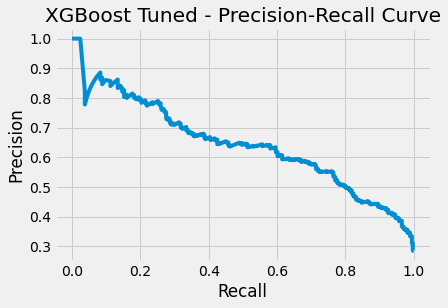

F1 Score: 0.6107784431137724 
AUC Score (PR): 0.6435938878934424

Accuracy on training set :  0.7669333333333334
Accuracy on test set :  0.7228144989339019
Recall on training set :  0.8622073578595317
Recall on test set :  0.8181818181818182
Precision on training set :  0.5384294068504595
Precision on test set :  0.4872611464968153
F1 on training set :  0.6628953458472615
F1 on test set :  0.6107784431137724


In [83]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_xgb_tuned_prob = xgb_tuned.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, xgb_tuned, y_pred_xgb_tuned, 'XGBoost Tuned')
roc_curve_auc_score(X_test, y_test, y_pred_xgb_tuned_prob, 'XGBoost Tuned')
precision_recall_curve_and_scores(X_test, y_test, y_pred_xgb_tuned, y_pred_xgb_tuned_prob, 'XGBoost Tuned')
scores_XGB_Tuned = get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)

In [78]:
# defining list of model
models = [knn, knn_cv, logreg, logreg_tuned_gs, rf, rf_random_grid, support_vector_m, support_vector_m_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [79]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "K Nearest Neighbour", 
            "K Nearest Neighbour Optimized", 
            "Logistic Regression", 
            "Logistic Regression Optimized", 
            "Random Forest",
            "Random Forest Optimized",
            "Support Vector Machines",
            "Support Vector Machines Optimized",
            "XGBoost", 
            "XGBoost Optimized"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1" : f1_train, 
        "Test_F1" : f1_test
    }
)

# Sorting models in decreasing order of Test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,K Nearest Neighbour,0.834133,0.751955,0.634783,0.548128,0.710329,0.532468,0.670434,0.540184
1,K Nearest Neighbour Optimized,0.606592,0.552561,0.578595,0.548128,0.637436,0.557065,0.606592,0.552561
2,Logistic Regression,0.803911,0.794598,0.553846,0.556150,0.655063,0.628399,0.600217,0.590071
3,Logistic Regression Optimized,0.604987,0.603086,0.559866,0.574866,0.658019,0.634218,0.604987,0.603086
4,Random Forest,0.998756,0.783937,0.996656,0.489305,0.998660,0.618243,0.997657,0.546269
5,Random Forest Optimized,0.724945,0.576867,0.662876,0.526738,0.799839,0.637540,0.724945,0.576867
6,Support Vector Machines,0.823822,0.792466,0.570569,0.524064,0.709651,0.632258,0.632555,0.573099
7,Support Vector Machines Optimized,0.594752,0.596888,0.545819,0.564171,0.653323,0.633634,0.594752,0.596888
8,XGBoost,0.822400,0.795309,0.566555,0.537433,0.707012,0.636076,0.629038,0.582609
9,XGBoost Optimized,0.766933,0.722814,0.862207,0.818182,0.538429,0.487261,0.662895,0.610778


### **Summary**
#### **Model Summary**
Looking at model results, the best accuracy on the test set is achieved by the `Logistic Regression` with 0,7945. Given the high imbalance of the data towards non-churners, it makes sense to compare F1 scores to get the model with the best score on jointly precision and recall. This would also be the `XGBoost Optimized` with a F1 score of 0,61 on the test set and 0.66 on the training data.

We shall move ahead with `Logistic Regression` for final conclusion and validation of hypothesis as it has the least amount of overfitting of the data. 

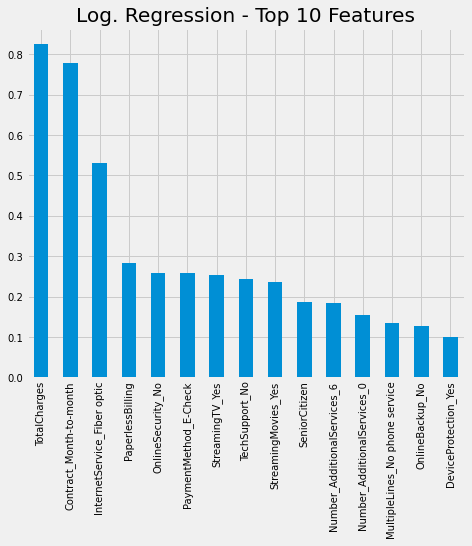

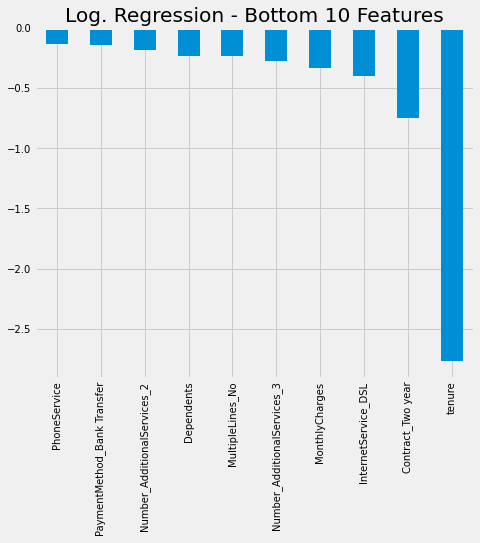

In [116]:
feature_weights(X1, logreg, 'Log. Regression')

## **Hypotheses Check**

Looking at the evaluation results, specifically the feature weights from the logistic regression, the hypotheses can be directionally supported or refused:

1. **Contract duration**: Contract duration month-to-month is the second biggest driver of churn → supported

2. **Number of additional services**: This feature ranks towards the lower end of the top 15 features → partially supported

3. **Partners and children**: This feature does not rank among the top features -> refused

4. **Tenure**: High tenure ranks as the strongest factor for not churning and the strongest feature overall. This is also supported by the boxplot in the EDA step. → supported

5. **Monthly payment**: Total payments, which is the product of tenure and monthly payment ranks as the strongest factor for churn. Indirectly, high monthly payments lead to churn. However, tenure is the highest driver of not churning → refused

6. **Senior citizens**: Senior citizens does not have high feature weights. Also the ratio of senior citizens who churn is much higher than that of non-churners → refused




